# How

- I joined a free class in [GSX](https://www.genshuixue.com/) and the class started from May 16th - May 18th.
- I followed the Appendex I from [Muddy Water Reserach Report](https://www.muddywatersresearch.com/research/gsx/mw-is-short-gsx/) and download message log file.
- I unzipped it into `all.json`.
- This class started at `05.16 19:40 - 20:20`

In [109]:
DATA_ROOT_PATH = '/src/data/gsx/6004241052268030'
FILENAME = 'all.json'

In [134]:
import numpy as np
import math
import os.path
import json
import time

In [111]:
with open(os.path.join(DATA_ROOT_PATH, FILENAME)) as jsonFile:
    msgLog = json.load(jsonFile)

In [112]:
# extract id and joinTime from the 'from' field
loginDict = dict()
for item in msgLog:
    userInfo = item.get('from')
    if userInfo is not None and userInfo.get('joinTime') is not None:
        loginDict[userInfo.get('id')] = userInfo.get('joinTime')

In [113]:
# The dictioanry with user ID as key and joinTime as value.
print(loginDict)

{'182027187': 1589625700, '182027913': 1589626021, '182028054': 1589626056, '182029353': 1589626431, '182029662': 1589626504, '182030553': 1589626684, '182030619': 1589626696, '182030541': 1589626680, '182030454': 1589626667, '182029953': 1589626574, '182029749': 1589626530, '182029467': 1589626467, '182032290': 1589626908, '182032407': 1589626919, '182033622': 1589627085, '182033970': 1589627129, '182034207': 1589627171, '182034030': 1589627141, '182033931': 1589627124, '182035032': 1589627269, '182031627': 1589626832, '182035122': 1589627288, '182033100': 1589627016, '182036190': 1589627407, '182036103': 1589627394, '182037522': 1589627580, '182037819': 1589627618, '182037726': 1589627603, '182033748': 1589627105, '182036742': 1589627478, '182037378': 1589627563, '182034306': 1589627181, '182029566': 1589626493, '182038608': 1589627701, '182037243': 1589627548, '182036523': 1589627454, '182038527': 1589627699, '182029332': 1589626421, '182039337': 1589627776, '182039448': 1589627785,

In [114]:
print(len(loginDict))

329


In [115]:
%matplotlib inline
import matplotlib.pyplot as plt

x = loginDict.keys()
y = loginDict.values()
y_np = np.array(list(y), dtype=np.int32)
from scipy import stats
stats.describe(y_np)


DescribeResult(nobs=329, minmax=(1589625700, 1589640926), mean=1589631112.3647416, variance=11536457.311679889, skewness=0.8308323177470095, kurtosis=-0.1274033207655778)

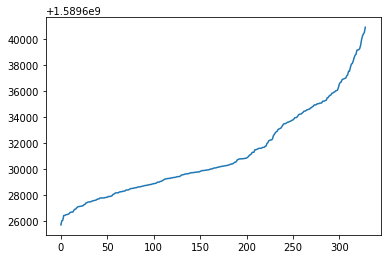

In [116]:
y_np_sorted = np.sort(y_np)
plt.plot(y_np_sorted)

In [129]:
print(y_np_sorted)

[1589625700 1589626021 1589626056 1589626421 1589626431 1589626467
 1589626493 1589626504 1589626530 1589626574 1589626667 1589626680
 1589626684 1589626696 1589626832 1589626908 1589626919 1589627016
 1589627085 1589627105 1589627124 1589627129 1589627141 1589627171
 1589627181 1589627269 1589627288 1589627394 1589627407 1589627454
 1589627466 1589627478 1589627479 1589627511 1589627548 1589627563
 1589627580 1589627603 1589627618 1589627678 1589627699 1589627701
 1589627770 1589627775 1589627776 1589627776 1589627780 1589627785
 1589627814 1589627825 1589627833 1589627885 1589627886 1589627902
 1589627904 1589627945 1589628038 1589628064 1589628125 1589628166
 1589628167 1589628174 1589628179 1589628239 1589628246 1589628260
 1589628266 1589628299 1589628307 1589628313 1589628381 1589628390
 1589628394 1589628403 1589628459 1589628487 1589628509 1589628510
 1589628530 1589628543 1589628560 1589628566 1589628584 1589628626
 1589628628 1589628628 1589628642 1589628664 1589628691 158962

In [130]:
firstDiff = np.diff(y_np_sorted)
# first difference in seconds
print(firstDiff)

[321  35 365  10  36  26  11  26  44  93  13   4  12 136  76  11  97  69
  20  19   5  12  30  10  88  19 106  13  47  12  12   1  32  37  15  17
  23  15  60  21   2  69   5   1   0   4   5  29  11   8  52   1  16   2
  41  93  26  61  41   1   7   5  60   7  14   6  33   8   6  68   9   4
   9  56  28  22   1  20  13  17   6  18  42   2   0  14  22  27   4  30
  10  16   7  14  30   7   2  34  12  24   6  15  24  65   5   4  47  10
  37  42  49  42  16  18  10  10   6   2  35   0  29   1   6  21  31   8
   6   4  58  52  21   8  22  36   1   7  18   3  37  21   4   2  12  14
  15   0  18   0   6  32  41  26   4   1  17   9  15   1  13  16  40  13
   3  35  33   3   5  30  21   9  24  14  11  17  13  15  11   8  13  14
  20  47  12  26   8  38  73  18  47 117  46  34  10   3   2   7   2  28
   0  16  60  51  97  47  49 123  22   4 186   7  30  25  46   5   4   4
  56   8   6  71  24 196  69 150  30  32   0  80 245 101 120  76  38 143
  40  35  27 106 103 117  18   4  45  58  11  33  2

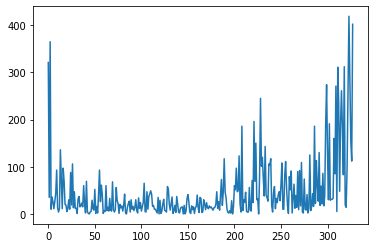

In [131]:
plt.plot(firstDiff)

In [117]:
y_np_min = np.min(y_np)
y_np_max = np.max(y_np)
print("min:%d, max:%d" % (y_np_min, y_np_max))

min:1589625700, max:1589640926


In [187]:
from datetime import datetime as dt
import time
from datetime import tzinfo as tz
from datetime import timezone 
from datetime import timedelta

UTC0800=timezone(+timedelta(hours=8, minutes=0))

def get_datetime_utc0800(timestamp):
    return dt.fromtimestamp(timestamp, tz=UTC0800)

In [189]:
# print sorted login time
for y in y_np_sorted:
    print(get_datetime_utc0800(y))

2020-05-16 18:41:40+08:00
2020-05-16 18:47:01+08:00
2020-05-16 18:47:36+08:00
2020-05-16 18:53:41+08:00
2020-05-16 18:53:51+08:00
2020-05-16 18:54:27+08:00
2020-05-16 18:54:53+08:00
2020-05-16 18:55:04+08:00
2020-05-16 18:55:30+08:00
2020-05-16 18:56:14+08:00
2020-05-16 18:57:47+08:00
2020-05-16 18:58:00+08:00
2020-05-16 18:58:04+08:00
2020-05-16 18:58:16+08:00
2020-05-16 19:00:32+08:00
2020-05-16 19:01:48+08:00
2020-05-16 19:01:59+08:00
2020-05-16 19:03:36+08:00
2020-05-16 19:04:45+08:00
2020-05-16 19:05:05+08:00
2020-05-16 19:05:24+08:00
2020-05-16 19:05:29+08:00
2020-05-16 19:05:41+08:00
2020-05-16 19:06:11+08:00
2020-05-16 19:06:21+08:00
2020-05-16 19:07:49+08:00
2020-05-16 19:08:08+08:00
2020-05-16 19:09:54+08:00
2020-05-16 19:10:07+08:00
2020-05-16 19:10:54+08:00
2020-05-16 19:11:06+08:00
2020-05-16 19:11:18+08:00
2020-05-16 19:11:19+08:00
2020-05-16 19:11:51+08:00
2020-05-16 19:12:28+08:00
2020-05-16 19:12:43+08:00
2020-05-16 19:13:00+08:00
2020-05-16 19:13:23+08:00
2020-05-16 1

## Find the Precise Joiner

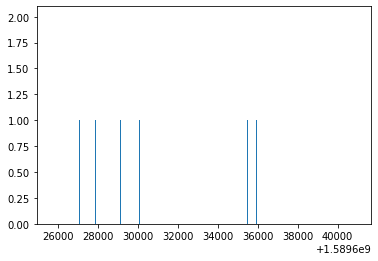

In [118]:
# I bucketed loginTime by 329 bins. It is more than enough.
n, bins, patches = plt.hist(y_np_sorted, range(y_np_min, y_np_max))

In [128]:
print(n)
print(len(n))
print(bins)
print(len(bins))
print(patches)

[1. 0. 0. ... 0. 0. 0.]
15225
[1589625700 1589625701 1589625702 ... 1589640923 1589640924 1589640925]
15226
<a list of 15225 Patch objects>


In [120]:
n_indexes = list()

for index in range(len(n)):
    if n[index] > 1:
        n_indexes.append(index)
print(n_indexes)

[2076, 2928, 3624, 4061, 4079, 5130, 6548]


In [121]:
len(n_indexes)

7

In [122]:
duplicate_logintime = np.asarray(bins[n_indexes])

In [123]:
duplicate_logintime_ids = list()
for logintime in duplicate_logintime:
    for k, v in loginDict.items():
        if v == logintime:
            duplicate_logintime_ids.append(k)

In [124]:
print(duplicate_logintime)
print(len(duplicate_logintime))

[1589627776 1589628628 1589629324 1589629761 1589629779 1589630830
 1589632248]
7


In [125]:
print(duplicate_logintime_ids)
print(len(duplicate_logintime_ids))

['182039337', '182039358', '182049108', '182049132', '182057118', '182057127', '182063094', '182063082', '182063271', '182063346', '182076078', '182076108', '182089374', '182089386']
14


In [126]:
# the odd that they login at the same time
1/abs(y_np_min - y_np_max)

6.567713122290818e-05

In [191]:
for id in duplicate_logintime_ids:
    print('ID: %s, Login Time: %s' % (id, get_datetime_utc0800(loginDict[id])))

ID: 182039337, Login Time: 2020-05-16 19:16:16+08:00
ID: 182039358, Login Time: 2020-05-16 19:16:16+08:00
ID: 182049108, Login Time: 2020-05-16 19:30:28+08:00
ID: 182049132, Login Time: 2020-05-16 19:30:28+08:00
ID: 182057118, Login Time: 2020-05-16 19:42:04+08:00
ID: 182057127, Login Time: 2020-05-16 19:42:04+08:00
ID: 182063094, Login Time: 2020-05-16 19:49:21+08:00
ID: 182063082, Login Time: 2020-05-16 19:49:21+08:00
ID: 182063271, Login Time: 2020-05-16 19:49:39+08:00
ID: 182063346, Login Time: 2020-05-16 19:49:39+08:00
ID: 182076078, Login Time: 2020-05-16 20:07:10+08:00
ID: 182076108, Login Time: 2020-05-16 20:07:10+08:00
ID: 182089374, Login Time: 2020-05-16 20:30:48+08:00
ID: 182089386, Login Time: 2020-05-16 20:30:48+08:00
